In [1]:
import tweepy
import json
import pandas as pd
from scipy.misc import imread
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib as mpl
import csv
import matplotlib.pyplot as plt

import operator
from textblob import TextBlob
from textblob import Word
from textblob.sentiments import NaiveBayesAnalyzer

ModuleNotFoundError: No module named 'tweepy'

In [ ]:
# Step 1 - Authenticate
consumer_key= '4eEkAPllUVzfIv41iEBrEkpSK'
consumer_secret= 'FTy9x780v2j28EGYxxRJVxm37SiCAyLQENnvhfgTDb0gXQ1klM'

access_token='4872501094-dqbeqpcX4SLbhP9xJs4ddhO3rlJXH62gptuflBI'
access_token_secret='mAbJmgFx5xBK057KW12LMJbg7MeHXz1a1aGZBOfA1OUwp'

In [ ]:
# Creating the authentication object
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# Setting your access token and secret
auth.set_access_token(access_token, access_token_secret)
# Creating the API object while passing in auth information
api = tweepy.API(auth) 

In [ ]:
#Extracting Tweets
results = []
for tweet in tweepy.Cursor (api.search, q = 'lenovo', lang = "en").items(1000): 
    results.append(tweet)
print (type(results))
print (len(results))

<type 'list'>
1000


In [ ]:
#Store tweets data in a dataframe
#Semantic Similarity is used for clustering contextually similar tweets.-identify fake users and delete their tweets.

def tweets_df(results):
    id_list = [tweet.id for tweet  in results]
    data_set = pd.DataFrame(id_list, columns = ["id"])
    
    data_set["text"] = [tweet.text for tweet in results]
    data_set["created_at"] = [tweet.created_at for tweet in results]
    data_set["retweet_count"] = [tweet.retweet_count for tweet in results]
    data_set["user_screen_name"] = [tweet.author.screen_name for tweet in results]
    data_set["user_followers_count"] = [tweet.author.followers_count for tweet in results]
    data_set["user_location"] = [tweet.author.location for tweet in results]
    data_set["Hashtags"] = [tweet.entities.get('hashtags') for tweet in results]
    
    return data_set
data_set = tweets_df(results)
#['id','created_at','retweet_count','user_screen_name','user_followers_count','user_location','Hashtags','text','Sentiment','SentimentClass']


In [ ]:
print data_set["Hashtags"]

0                                                     []
1            [{u'indices': [34, 40], u'text': u'China'}]
2                                                     []
3      [{u'indices': [36, 45], u'text': u'homemade'},...
4                                                     []
5                                                     []
6         [{u'indices': [112, 119], u'text': u'LENOVO'}]
7         [{u'indices': [125, 132], u'text': u'8thGen'}]
8                                                     []
9                                                     []
10     [{u'indices': [82, 90], u'text': u'BrushUp'}, ...
11              [{u'indices': [20, 23], u'text': u'ad'}]
12                                                    []
13              [{u'indices': [20, 23], u'text': u'ad'}]
14     [{u'indices': [89, 106], u'text': u'jedichalle...
15     [{u'indices': [82, 90], u'text': u'BrushUp'}, ...
16       [{u'indices': [121, 129], u'text': u'BrushUp'}]
17     [{u'indices': [82, 90], 

In [ ]:
Htag_df = pd.DataFrame()
j = 0

for tweet in range(0,len(results)):
    hashtag = results[tweet].entities.get('hashtags')
    for i in range(0,len(hashtag)):
        Htag = hashtag[i]['text'] 
        Htag_df.set_value(j, 'Hashtag',Htag)
        j = j+1



NameError: name 'unique' is not defined

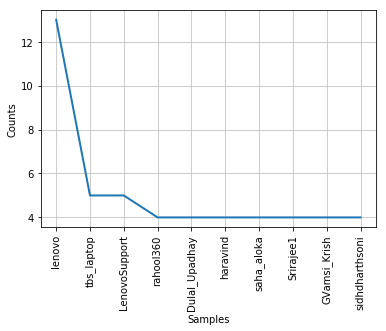

In [ ]:
from nltk import FreqDist
users = data_set["user_screen_name"].tolist()
fdist2 = FreqDist(users)
fdist2.plot(10)

In [ ]:

fdist1 = FreqDist(hashtags)
#fdist1.plot(10)

AttributeError: 'list' object has no attribute 'split'

In [ ]:
from nltk.tokenize import TweetTokenizer
#from nltk.corpus import stopwords
import re, string
import nltk
tweets_texts = data_set["text"].tolist()
stopwords=set(open('F:/data/stopwords.txt').read().split())
#english_vocab = set(w.lower() for w in nltk.corpus.words.words())

def process_tweet_text(tweet):
   if tweet.startswith('@null'):
       return "[Tweet not available]"
   tweet = re.sub(r'\$\w*','',tweet) # Remove tickers
   tweet = re.sub(r'https?:\/\/.*\/\w*','',tweet) # Remove hyperlinks
   tweet = re.sub(r'['+string.punctuation+']+', ' ',tweet) # Remove puncutations like 's
   twtok = TweetTokenizer(strip_handles=True, reduce_len=True)
   tokens = twtok.tokenize(tweet)
   tokens = [i.lower() for i in tokens if i not in stopwords and len(i) > 2 ]
   return tokens
words = []
for tw in tweets_texts:
      words += process_tweet_text(tw)

In [ ]:
print words

[u'socedo', u'aseemb', u'chatted', u'lenovo', u'marketing', u'manager', u'mballard', u'5574', u'customers', u'don', u'care', u'bigdata', u'newz', u'lenovo', u'launches', u'china', u'industrial', u'big', u'data', u'application', u'alliance', u'boost', u'smart', u'manufacturing', u'http', u'pauchinou', u'spotify', u'hey', u'guys', u'reason', u'spotify', u'skips', u'title', u'run', u'win', u'lenovo', u'ideapad', u'reinstalling', u'didn', u'lenovo', u'starwars', u'son', u'homemade', u'jedi', u'costume', u'pair', u'curtains', u'jedichallengesuk', u'o2priority', u'twrp', u'root', u'and', u'bootloader', u'unlock', u'for', u'lenovo', u'vibe', u'shot', u'droid', u'school', u'miranda', u'blu', u'new', u'video', u'giveaway', u'join', u'adventure', u'science', u'museum', u'planetarium', u'and', u'giving', u'len', u'odin', u'omen', u'new', u'video', u'come', u'hang', u'miranda', u'science', u'museum', u'planetarium', u'win', u'lenovo', u'backpack', u'win', u'stacieinatlanta', u'loving', u'top', u'p

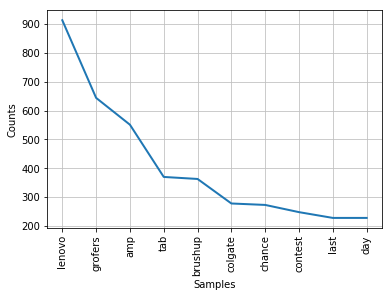

In [ ]:
fdist3 = FreqDist(words)
fdist3.plot(10)

In [ ]:
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(words, 5)
finder.apply_freq_filter(5)
print(finder.nbest(bigram_measures.likelihood_ratio, 10))

[(u'question', u'winning'), (u'day', u'winning'), (u'last', u'question'), (u'question', u'day'), (u'last', u'day'), (u'colgate', u'contest'), (u'colgate', u'grofers'), (u'brushup', u'colgate'), (u'chance', u'winning'), (u'question', u'chance')]


In [ ]:
cleaned_tweets = []
for tw in tweets_texts:
    words = process_tweet_text(tw)
    cleaned_tweet = " ".join(w for w in words if len(w) > 2 and 
w.isalpha()) #Form sentences of processed words
    cleaned_tweets.append(cleaned_tweet)
data_set['CleanTweetText'] = cleaned_tweets

In [ ]:
data_set['CleanTweetText'] 

0      socedo aseemb chatted lenovo marketing manager...
1      bigdata newz lenovo launches china industrial ...
2      pauchinou spotify hey guys reason spotify skip...
3      lenovo starwars son homemade jedi costume pair...
4      twrp root and bootloader unlock for lenovo vib...
5      miranda blu new video giveaway join adventure ...
6      odin omen new video come hang miranda science ...
7      stacieinatlanta loving top picks family holida...
8      xite tech with dual rear cameras inch display ...
9      lenovo yoga full touchscreen flagship high per...
10     grofers last question day amp chance winning l...
11     mildmeandering upgraded lenovo yoga intel gen ...
12     added video youtube playlist this free laptop ...
13     mildmeandering upgraded lenovo yoga intel gen ...
14     lenovo starwars husband homemade storm trooper...
15     grofers last question day amp chance winning l...
16     grofers tweeples get ready home lenovo tab all...
17     grofers last question da

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer  
tfidf_vectorizer = TfidfVectorizer(use_idf=True, ngram_range=(1,3))  
tfidf_matrix = tfidf_vectorizer.fit_transform(cleaned_tweets)  
feature_names = tfidf_vectorizer.get_feature_names() # num phrases  
from sklearn.metrics.pairwise import cosine_similarity  
dist = 1 - cosine_similarity(tfidf_matrix)  
print(dist) 



[[  1.11022302e-16   9.99113850e-01   9.99184596e-01 ...,   1.00000000e+00
    9.98853196e-01   9.97677463e-01]
 [  9.99113850e-01   0.00000000e+00   9.99273708e-01 ...,   1.00000000e+00
    9.98978525e-01   9.97931283e-01]
 [  9.99184596e-01   9.99273708e-01   0.00000000e+00 ...,   1.00000000e+00
    9.99060074e-01   9.98096438e-01]
 ..., 
 [  1.00000000e+00   1.00000000e+00   1.00000000e+00 ...,  -2.22044605e-16
    1.00000000e+00   1.00000000e+00]
 [  9.98853196e-01   9.98978525e-01   9.99060074e-01 ...,   1.00000000e+00
   -2.22044605e-16   9.97322785e-01]
 [  9.97677463e-01   9.97931283e-01   9.98096438e-01 ...,   1.00000000e+00
    9.97322785e-01  -2.22044605e-16]]


In [ ]:
from sklearn.cluster import KMeans 
num_clusters = 3  
km = KMeans(n_clusters=num_clusters)  
km.fit(tfidf_matrix)  
clusters = km.labels_.tolist()  
data_set['ClusterID'] = clusters  
print(data_set['ClusterID'].value_counts())

0    690
1    225
2     85
Name: ClusterID, dtype: int64


In [ ]:
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(num_clusters):
    print("Cluster {} : Words :".format(i))
    for ind in order_centroids[i, :10]: 
        print(' %s' % feature_names[ind])

Cluster 0 : Words :
 lenovo
 yoga
 lenovo yoga
 review
 lenovo yoga review
 yoga review
 ovidiojunior
 your
 laptop
 make
Cluster 1 : Words :
 amp
 grofers
 tab brushup colgate
 brushup colgate amp
 colgate amp
 colgate amp grofers
 amp chance
 amp chance winning
 amp grofers
 amp grofers contest
Cluster 2 : Words :
 tab all pay
 lenovo tab all
 ready home
 brushup col
 ready
 tweeples
 tweeples get
 tweeples get ready
 home
 home lenovo


In [ ]:
#Topic Modeling
#Latent Dirichlet Allocation (LDA)
from gensim import corpora, models
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string

C:\Users\sujata\AppData\Local\Continuum\anaconda2\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [ ]:
stop =set(open('F:/data/stopwords.txt').read().split())
exclude = set(string.punctuation)
#lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
   
    return punc_free
texts = [text for text in cleaned_tweets if len(text) > 2]
doc_clean = [clean(doc).split() for doc in texts]
dictionary = corpora.Dictionary(doc_clean)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
ldamodel = models.ldamodel.LdaModel(doc_term_matrix, num_topics=6, id2word = 
dictionary, passes=5)
for topic in ldamodel.show_topics(num_topics=6, formatted=False, num_words=6):
    print("Topic {}: Words: ".format(topic[0]))
    topicwords = [w for (w, val) in topic[1]]
    print(topicwords)

Topic 0: Words: 
[u'lenovo', u'jedi', u'wars', u'star', u'challenges', u'headset']
Topic 1: Words: 
[u'lenovo', u'tab', u'answer', u'grofers', u'brushup', u'attention']
Topic 2: Words: 
[u'grofers', u'amp', u'lenovo', u'tab', u'brushup', u'colgate']
Topic 3: Words: 
[u'lenovo', u'vdi', u'daas', u'workspace', u'flexible', u'vision']
Topic 4: Words: 
[u'lenovo', u'team', u'amp', u'snipers', u'silver', u'age']
Topic 5: Words: 
[u'lenovo', u'thinkpad', u'world', u'changing', u'share', u'thinkstories']


In [ ]:
#Doc2vec
#total_examples=tweet_w2v.corpus_count

import gensim
from gensim.models.doc2vec import TaggedDocument
taggeddocs = []
tag2tweetmap = {}
for index,i in enumerate(cleaned_tweets):
    if len(i) > 2: # Non empty tweets
        tag = u'SENT_{:d}'.format(index)
        sentence = TaggedDocument(words=gensim.utils.to_unicode(i).split(),tags=[tag])
        tag2tweetmap[tag] = i
        taggeddocs.append(sentence)
        
print taggeddocs


[TaggedDocument(words=[u'socedo', u'aseemb', u'chatted', u'lenovo', u'marketing', u'manager', u'mballard', u'customers', u'don', u'care'], tags=[u'SENT_0']), TaggedDocument(words=[u'bigdata', u'newz', u'lenovo', u'launches', u'china', u'industrial', u'big', u'data', u'application', u'alliance', u'boost', u'smart', u'manufacturing', u'http'], tags=[u'SENT_1']), TaggedDocument(words=[u'pauchinou', u'spotify', u'hey', u'guys', u'reason', u'spotify', u'skips', u'title', u'run', u'win', u'lenovo', u'ideapad', u'reinstalling', u'didn'], tags=[u'SENT_2']), TaggedDocument(words=[u'lenovo', u'starwars', u'son', u'homemade', u'jedi', u'costume', u'pair', u'curtains', u'jedichallengesuk'], tags=[u'SENT_3']), TaggedDocument(words=[u'twrp', u'root', u'and', u'bootloader', u'unlock', u'for', u'lenovo', u'vibe', u'shot', u'droid', u'school'], tags=[u'SENT_4']), TaggedDocument(words=[u'miranda', u'blu', u'new', u'video', u'giveaway', u'join', u'adventure', u'science', u'museum', u'planetarium', u'and'

In [ ]:

model = gensim.models.Doc2Vec(taggeddocs, dm=0, alpha=0.025, size=20, min_alpha=0.025, min_count=0)
for epoch in range(60):
    if epoch % 20 == 0:
        print('Now training epoch %s' % epoch)
    #model.train(taggeddocs)
    model.train(taggeddocs, total_examples=model.corpus_count, epochs=2)
    model.alpha -= 0.002  # decrease the learning rate
    model.min_alpha = model.alpha  # fix the learning rate, no decay

Now training epoch 0
Now training epoch 20
Now training epoch 40


In [ ]:
#Kmeeans clustering on doc vectors


from sklearn.cluster import KMeans
dataSet = model.wv.syn0
kmeansClustering = KMeans(n_clusters=6)
centroidIndx = kmeansClustering.fit_predict(dataSet)
topic2wordsmap = {}
for i, val in enumerate(dataSet):
    tag = model.docvecs.index_to_doctag(i)
    topic = centroidIndx[i]
    if topic in topic2wordsmap.keys():
         for w1 in (tag2tweetmap[tag].split()):
            topic2wordsmap[topic].append(w)
    else:
              topic2wordsmap[topic] = []


KeyError: 1000

In [ ]:
#https://www.analyticsvidhya.com/blog/2017/01/sentiment-analysis-of-twitter-posts-on-chennai-floods-using-python/